# Environment Setup

In [1]:
from distutils.version import StrictVersion

In [2]:
#!conda install --name root scikit-learn -y

In [3]:
#!conda install --name root matplotlib -y

In [4]:
import sklearn
assert(StrictVersion(sklearn.__version__) >= StrictVersion('0.18.1'))

sklearn.__version__

'0.18.1'

In [5]:
#!conda install --name root -c conda-forge tensorflow -y

In [6]:
import tensorflow as tf
assert(StrictVersion(tf.__version__) >= StrictVersion('1.0.0'))
tf.__version__

'1.4.0'

In [7]:
#!conda install --name root keras -y

In [8]:
import keras
assert(StrictVersion(tf.__version__) >= StrictVersion('1.2.2'))
keras.__version__

Using TensorFlow backend.


'2.0.9'

In [9]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K

# Data loading

In [11]:
# Load pre-shuffled MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axis']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


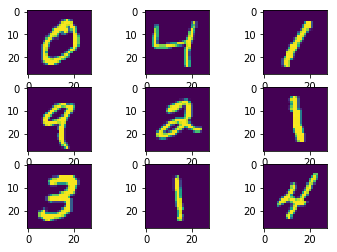

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

fig = plt.figure()
rows = 3
cols = 3
for i in range(1,rows+1):
    for j in range(1,cols+1):    
        axis = fig.add_subplot(rows,cols,rows*(i-1)+j)
        axis.imshow(x_train[rows*(i-1)+j])


# Hyperpaprameters

In [15]:
batch_size = 128
num_classes = 10
epochs = 12

# Data preprocess

In [16]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Model

In [17]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Building model

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# Training

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.3462 - acc: 0.8951 - val_loss: 0.0757 - val_acc: 0.9773

# Test / Evaluation

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])